In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

In [47]:
df = pd.read_csv(r'/content/sample_data/fashion-mnist_train.csv')

In [51]:
df=df.fillna(0)

In [52]:
x=df.drop('label',axis=1)
y=df['label']

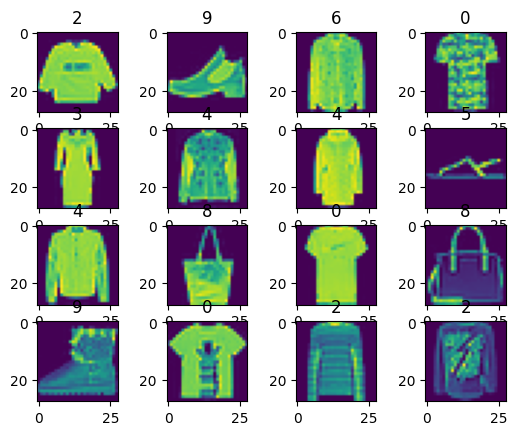

In [53]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.title(y.iloc[i])
  plt.imshow(x.iloc[i].values.reshape(28,28))
plt.show()

In [54]:
class custom_dataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

In [55]:
x=x/255.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)
print(torch.isnan(X_train).any(), torch.isinf(X_train).any())
print(torch.isnan(X_test).any(), torch.isinf(X_test).any())

tensor(False) tensor(False)
tensor(False) tensor(False)


In [59]:

train_loader = DataLoader(custom_dataset(X_train, y_train), batch_size=32, shuffle=True,pin_memory=True)
test_loader = DataLoader(custom_dataset(X_test, y_test), batch_size=32, shuffle=False,pin_memory=True)

In [60]:


class Model(nn.Module):
  def __init__(self,input_len):
    super(Model,self).__init__()
    self.net=nn.Sequential(nn.Linear(input_len,128),
                           nn.ReLU(),
                           nn.BatchNorm1d(128),
                           nn.Dropout(0.2),
                           nn.Linear(128,64),
                           nn.ReLU(),
                           nn.BatchNorm1d(64),
                           nn.Dropout(0.2),
                           nn.Linear(64,10))

  def forward(self,x):
    return self.net(x)




In [61]:
x,y = next(iter(train_loader))
input_len = len(x[0])

In [62]:

mymodel = Model(input_len).to(device)

In [63]:
loss = nn.CrossEntropyLoss()

In [64]:
optim = torch.optim.SGD(mymodel.parameters(),lr=0.0001)

In [65]:
for i in range(50):
  net_loss = 0
  for x,y in train_loader:
    x = x.to(device)
    y = y.to(device)
    y_pred = mymodel(x)
    l = loss(y_pred,y)
    optim.zero_grad()
    l.backward()
    optim.step()
    net_loss+=l.item()
  print(f'epoch {i} loss {net_loss/len(train_loader)}')



epoch 0 loss 1.7230631730556487
epoch 1 loss 1.2926435852050782
epoch 2 loss 1.1358336776097615
epoch 3 loss 1.041433270295461
epoch 4 loss 0.9755304609537124
epoch 5 loss 0.9182204863627752
epoch 6 loss 0.877426231622696
epoch 7 loss 0.8396023711363475
epoch 8 loss 0.8103174337744713
epoch 9 loss 0.7838390259544055
epoch 10 loss 0.7625970896085104
epoch 11 loss 0.7422120872139931
epoch 12 loss 0.7259234729210535
epoch 13 loss 0.7056241316596666
epoch 14 loss 0.6936261691649754
epoch 15 loss 0.6817335235277812
epoch 16 loss 0.6673779722849528
epoch 17 loss 0.6577508277694384
epoch 18 loss 0.6447649156252543
epoch 19 loss 0.6342699281573295
epoch 20 loss 0.6282668108741443
epoch 21 loss 0.6193726355830829
epoch 22 loss 0.6105562047958374
epoch 23 loss 0.6046721906463305
epoch 24 loss 0.5975936664144198
epoch 25 loss 0.5897121697862943
epoch 26 loss 0.5827119172116121
epoch 27 loss 0.5811958566705386
epoch 28 loss 0.5738927537401517
epoch 29 loss 0.5666800021032492
epoch 30 loss 0.567956

In [67]:
mymodel.eval()


Model(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [68]:
accuracy=0
total=0
for x,y in test_loader:
  x = x.to(device)
  y = y.to(device)
  y_pred = mymodel(x)
  accuracy+=(y_pred.argmax(dim=1)==y).sum().item()
  total+=len(y)
print(f'accuracy : {accuracy/total}')


accuracy : 0.85375
